2.Implement both the Floyd-Steinberg and Jarvis-Judice-Ninke dithering algorithms on
the image in either Python or MATLAB, then compare the results obtained from
each method.

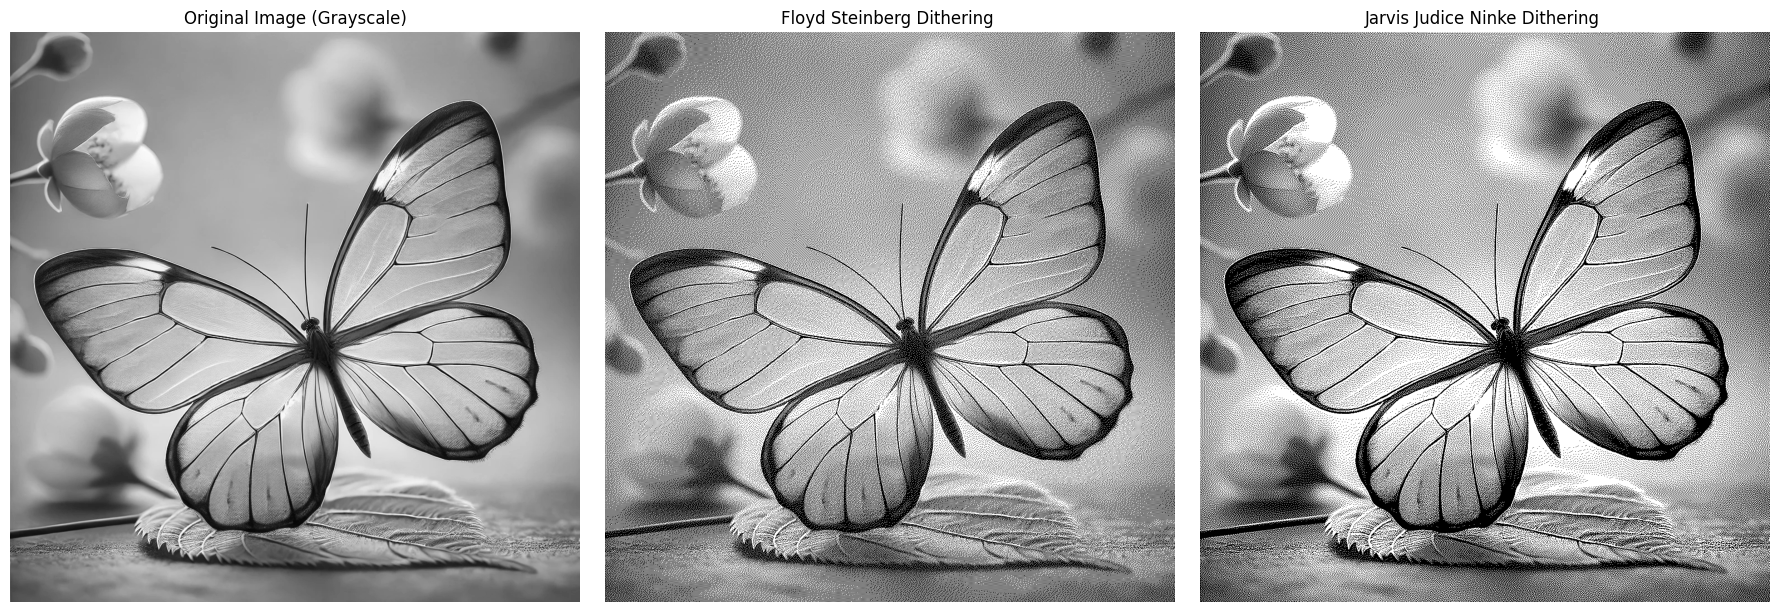

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def apply_floyd_steinberg_dither_bw(input_image):
    # Ensure the image is in grayscale mode
    gray_image = input_image.convert('L')
    pixel_array = np.array(gray_image, dtype=np.float32)
    img_height, img_width = pixel_array.shape
    dithered_image = np.zeros_like(pixel_array, dtype=np.uint8)

    for row in range(img_height):
        for col in range(img_width):
            original_val = pixel_array[row, col]
            threshold_val = 255 * (original_val > 127)
            dithered_image[row, col] = threshold_val
            error = original_val - threshold_val

            if col + 1 < img_width:
                pixel_array[row, col + 1] += error * 7 / 16
            if row + 1 < img_height:
                if col > 0:
                    pixel_array[row + 1, col - 1] += error * 3 / 16
                pixel_array[row + 1, col] += error * 5 / 16
                if col + 1 < img_width:
                    pixel_array[row + 1, col + 1] += error * 1 / 16

    return Image.fromarray(dithered_image)

def apply_jarvis_judice_ninke_dither_bw(input_image):

    gray_image = input_image.convert('L')
    pixel_array = np.array(gray_image, dtype=np.float32)
    img_height, img_width = pixel_array.shape
    dithered_image = np.zeros_like(pixel_array, dtype=np.uint8)

    for y in range(img_height):
        for x in range(img_width):
            original_val = pixel_array[y, x]
            new_pixel = 255 * (original_val > 127)
            dithered_image[y, x] = new_pixel
            error = original_val - new_pixel

            if x + 1 < img_width:
                pixel_array[y, x + 1] += error * 7 / 48
            if x + 2 < img_width:
                pixel_array[y, x + 2] += error * 5 / 48
            if y + 1 < img_height:
                if x > 0:
                    pixel_array[y + 1, x - 1] += error * 3 / 48
                pixel_array[y + 1, x] += error * 5 / 48
                if x + 1 < img_width:
                    pixel_array[y + 1, x + 1] += error * 3 / 48
                if x + 2 < img_width:
                    pixel_array[y + 1, x + 2] += error * 1 / 48
            if y + 2 < img_height:
                if x - 2 >= 0:
                    pixel_array[y + 2, x - 2] += error * 1 / 48
                if x - 1 >= 0:
                    pixel_array[y + 2, x - 1] += error * 3 / 48
                pixel_array[y + 2, x] += error * 5 / 48
                if x + 1 < img_width:
                    pixel_array[y + 2, x + 1] += error * 3 / 48
                if x + 2 < img_width:
                    pixel_array[y + 2, x + 2] += error * 1 / 48

    return Image.fromarray(dithered_image)


image_filepath = 'butterful.png'
original_img = Image.open(image_filepath).convert('L')


floyd_result_bw = apply_floyd_steinberg_dither_bw(original_img)

jarvis_result_bw = apply_jarvis_judice_ninke_dither_bw(original_img)


plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(floyd_result_bw, cmap='gray')
plt.title('Floyd Steinberg Dithering ')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(jarvis_result_bw, cmap='gray')
plt.title('Jarvis Judice Ninke Dithering ')
plt.axis('off')

plt.tight_layout()
plt.show()


**Floyd-Steinberg Dithering:** bold text Grainy Texture: The algorithm produces a noticeable, high-contrast texture due to the way it spreads pixel errors. This can result in a grainy appearance, especially in areas with rapid color changes. Detail Retention: Some fine details are preserved, but there is often visible speckling in areas with smooth color transitions, which can make certain areas look noisy. Sharper Edges: This dithering technique emphasizes contrast, making edges appear sharper and more pronounced, which can lead to a more dramatic effect in the image.

**Jarvis-Judice-Ninke Dithering:** Smoother Texture: The dithering pattern results in a finer, smoother appearance with less graininess. The error distribution covers a larger area, which softens the overall texture. Softer Transitions: Edges appear less harsh, as the pixel distribution is more balanced, giving the image a softer, more refined look. Enhanced Gradients: This method handles gradual color transitions better, resulting in smoother gradients. The image looks more natural, especially in areas with subtle color variations.

**Comparison:** Floyd-Steinberg: Ideal for high-contrast results where sharper details and textures are desired. It can make the image appear more dramatic but tends to introduce noise in smoother areas. Jarvis-Judice-Ninke: Excellent for creating smoother, more balanced images. It works well in areas with gradual transitions, providing a cleaner look and reducing harsh edges. Choosing Between the Two: Opt for Floyd-Steinberg if you want a bold, high-contrast look with emphasis on details. Choose Jarvis-Judice-Ninke if you prefer smoother, refined results with softer transitions, especially for images with gradual color changes.

**Kuwahara Filter for Image Processing**
The Kuwahara filter is a smoothing filter used in image processing that effectively reduces noise while preserving edges. In the context of the image you are working with, this filter helps retain the sharp details of the flower and surrounding elements, ensuring edges remain intact even after smoothing.

**Working:**
The Kuwahara filter processes each pixel by examining a neighborhood around it, which is divided into four regions. For each region, the filter calculates the mean and variance. The region with the smallest variance is then selected, and the pixel is replaced by the mean of this region. This method allows the Kuwahara filter to smooth areas without blurring edges, maintaining the distinct details in the flower petals and surrounding foliage.

**Key Features:**
Edge Preservation: Unlike traditional filters that may blur all details, the Kuwahara filter maintains the sharpness of edges. In your flower image, this means the edges of petals and leaves remain crisp while noise is reduced in less detailed areas.

**Noise Reduction:** This filter smooths out noisy areas, which is useful for images with color variations like your flower image. The Kuwahara filter reduces random noise without compromising the clarity of fine details.

**Non-linear Behavior:** The filter adapts to the image content by selecting the region with the least variance, rather than averaging the entire neighborhood. This feature makes it particularly suited for images with varied textures, as it treats edges and smooth areas differently.

**Applications to Your Image:**
Artistic Effects: Applying the Kuwahara filter to your flower image can give it a "painterly" effect. It smooths the color transitions in the petals and background, while keeping the edges of the flower well-defined.

**Texture Smoothing:** For images with intricate textures, like the petals in colourful_flower.png, the Kuwahara filter effectively reduces noise in flat areas without blurring significant details.